In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Restaurant_Reviews.tsv',sep='\t')
df.head()
# Note, if the data extension is tsv or unknown, go with read_csv

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
df.shape

(1000, 2)

In [12]:
df['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

In [4]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


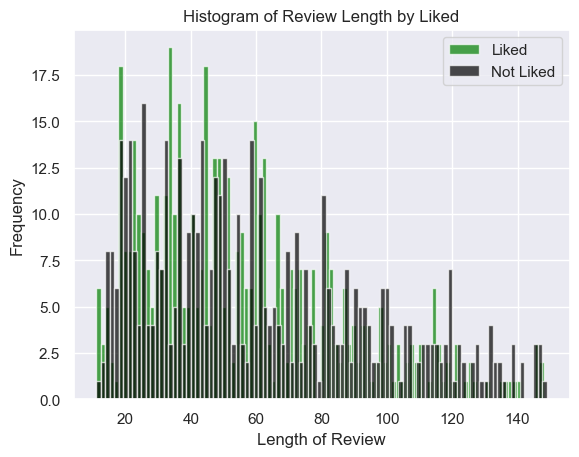

In [14]:
plt.hist(df[df['Liked'] == 1]['Review'].apply(len), bins=100, alpha=0.7, color='green', label='Liked')

# Plot histogram for 'Review' length where 'Liked' is not 'Liked'
plt.hist(df[df['Liked'] == 0]['Review'].apply(len), bins=100, alpha=0.7, color='black', label='Not Liked')

plt.legend()

# Add labels and title
plt.xlabel('Length of Review')
plt.ylabel('Frequency')
plt.title('Histogram of Review Length by Liked')

# Show the plot
plt.show()

In [15]:
# splitting train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df['Review'], df['Liked'],test_size=0.3, random_state=101)

In [19]:
y_test

545    1
298    0
109    1
837    0
194    0
      ..
847    1
682    1
884    0
325    1
482    0
Name: Liked, Length: 300, dtype: int64

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine learning algorithm
from sklearn.ensemble import RandomForestClassifier

In [22]:
from sklearn.pipeline import Pipeline

Using Pipeline

In [23]:
classifier = Pipeline([('TF-IDF', TfidfVectorizer()),('Classifier',RandomForestClassifier())])

In [24]:
classifier.fit(x_train,y_train)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()),
                ('Classifier', RandomForestClassifier())])

In [25]:
y_pred_train= classifier.predict(x_train)
y_pred_test= classifier.predict(x_test)

In [27]:
y_pred_test

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0], d

In [29]:
#Evaluation matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [30]:
print(classification_report(y_train,y_pred_train))
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       350

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       150
           1       0.75      0.75      0.75       150

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



In [31]:
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

1.0
0.7533333333333333


SVC

In [39]:
from sklearn.svm import SVC

In [40]:
classifier1 = Pipeline([('TF-IDF', TfidfVectorizer()),('Classifier',SVC())])

In [41]:
classifier1.fit(x_train,y_train)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()), ('Classifier', SVC())])

In [42]:
y_pred_train_SVM= classifier1.predict(x_train)
y_pred_test_SVM= classifier1.predict(x_test)

In [43]:
print(classification_report(y_train,y_pred_train_SVM))
print(classification_report(y_test,y_pred_test_SVM))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       350
           1       1.00      0.99      1.00       350

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       150
           1       0.83      0.85      0.84       150

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [44]:
print(accuracy_score(y_train,y_pred_train_SVM))
print(accuracy_score(y_test,y_pred_test_SVM))

0.9971428571428571
0.8366666666666667


Trying XG Boost

In [45]:
from xgboost import XGBClassifier
# For regeression just use XGBRegression

In [46]:
classifier3 = Pipeline([('TF-IDF', TfidfVectorizer()),('Classifier',XGBClassifier())])

In [47]:
classifier3.fit(x_train,y_train)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()),
                ('Classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [48]:
y_pred_train_XGB= classifier3.predict(x_train)
y_pred_test_XGB= classifier3.predict(x_test)

In [49]:
print(classification_report(y_train,y_pred_train_XGB))
print(classification_report(y_test,y_pred_test_XGB))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       350
           1       0.99      0.97      0.98       350

    accuracy                           0.98       700
   macro avg       0.98      0.98      0.98       700
weighted avg       0.98      0.98      0.98       700

              precision    recall  f1-score   support

           0       0.77      0.70      0.73       150
           1       0.72      0.79      0.75       150

    accuracy                           0.74       300
   macro avg       0.75      0.74      0.74       300
weighted avg       0.75      0.74      0.74       300



In [50]:
print(accuracy_score(y_train,y_pred_train_XGB))
print(accuracy_score(y_test,y_pred_test_XGB))

0.98
0.7433333333333333


Overall SVM provides the best result